In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_html ('https://www.bls.gov/charts/job-openings-and-labor-turnover/job-openings-unemployment-beveridge-curve.htm')
# data = pd.read_html('https://www.bls.gov/charts/job-openings-and-labor-turnover/hire-seps-rates.htm')
def tweak_data(raw):
     return (raw.rename(columns = lambda col : col.lower().replace(' ', '_')).
             assign(month = lambda df : pd.to_datetime(df.month), 
     job_openings_rate = lambda df : df.job_openings_rate.str.replace ('%' , '').astype(float), 
     unemployment_rate = lambda df : df.unemployment_rate.str.replace ('%' , '').astype(float),
     )
)

In [2]:
data[0].head()

,Month,Job openings rate,Unemployment rate
0,Dec 2000,3.7%,3.9%
1,Jan 2001,3.8%,4.2%
2,Feb 2001,3.7%,4.2%
3,Mar 2001,3.5%,4.3%
4,Apr 2001,3.4%,4.4%


2000 2022


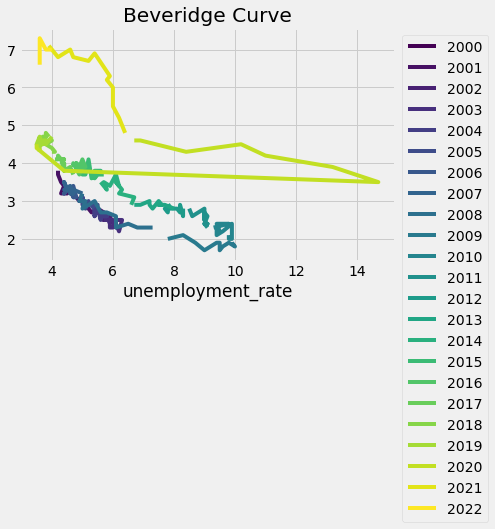

In [3]:
plt.style.use('fivethirtyeight')
bev_df = tweak_data(data[0])

viridis = matplotlib.cm.get_cmap('viridis', bev_df.month.dt.year.nunique())
print(viridis)
min_year = bev_df.month.dt.year.min()
max_year = bev_df.month.dt.year.max()
print(min_year, max_year)

fig, ax = plt.subplots()
_ = (bev_df.groupby(bev_df.month.dt.year).apply(lambda G: G.plot(x='unemployment_rate', y='job_openings_rate',
     c=viridis((G.name - min_year) / (max_year - min_year)),
     ax = ax , label = G.name , title = 'Beveridge Curve')),
)
ax.legend(bbox_to_anchor = (1,1))

In [4]:
df = pd.read_html('https://www.bls.gov/charts/job-openings-and-labor-turnover/opening-hire-seps-level.htm')
df[0].head()

,Month,Total nonfarm job openings,Total nonfarm hires,Total nonfarm separations,Total private job openings,Total private hires,Total private separations,Government job openings,Government hires,Government separations
0,June 2007,4859,5267,5108,4415,4884,4758,444,382,350
1,July 2007,4598,5217,5225,4150,4893,4850,449,325,375
2,Aug 2007,4546,5358,5382,4086,4958,5024,460,400,358
3,Sept 2007,4652,5344,5197,4204,4954,4868,448,391,328
4,Oct 2007,4636,5398,5252,4207,5068,4937,429,330,316


In [5]:
df = df[0]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Month                       181 non-null    object
 1   Total nonfarm job openings  181 non-null    int64 
 2   Total nonfarm hires         181 non-null    int64 
 3   Total nonfarm separations   181 non-null    int64 
 4   Total private job openings  181 non-null    int64 
 5   Total private hires         181 non-null    int64 
 6   Total private separations   181 non-null    int64 
 7   Government job openings     181 non-null    int64 
 8   Government hires            181 non-null    int64 
 9   Government separations      181 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 14.3+ KB


In [7]:
df.describe()

,Total nonfarm job openings,Total nonfarm hires,Total nonfarm separations,Total private job openings,Total private hires,Total private separations,Government job openings,Government hires,Government separations
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,5420.243094,5118.889503,5037.209945,4887.646409,4790.939227,4707.464088,532.602210,327.972376,329.795580
std,2216.225218,803.071402,1151.933611,2034.265499,772.646607,1119.105389,191.576781,57.651388,53.953037
min,2232.000000,3639.000000,3884.000000,1937.000000,3375.000000,3612.000000,274.000000,227.000000,260.000000
25%,3793.000000,4440.000000,4349.000000,3396.000000,4162.000000,4054.000000,389.000000,288.000000,294.000000
50%,5130.000000,5150.000000,5032.000000,4626.000000,4819.000000,4706.000000,479.000000,329.000000,319.000000
75%,6621.000000,5676.000000,5400.000000,5992.000000,5329.000000,5082.000000,641.000000,356.000000,347.000000
max,11855.000000,8145.000000,16336.000000,10812.000000,7890.000000,15759.000000,1105.000000,735.000000,594.000000


<AxesSubplot:>

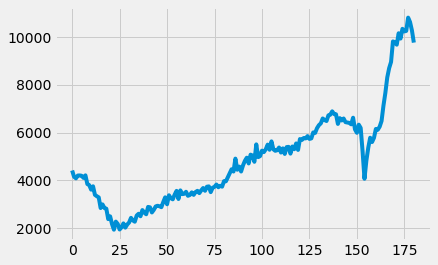

In [8]:
df['Total private job openings'].plot()

In [9]:
df['Total private job openings'].max()

10812

In [10]:
df['Total private job openings'].min()

1937

In [11]:
df['Total private job openings'].describe()

count      181.000000
mean      4887.646409
std       2034.265499
min       1937.000000
25%       3396.000000
50%       4626.000000
75%       5992.000000
max      10812.000000
Name: Total private job openings, dtype: float64

<AxesSubplot:xlabel='A', ylabel='B'>

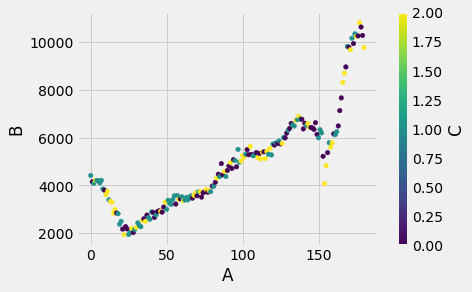

In [12]:
l = [i for i in range(df['Total private job openings'].count())]
cc = np.random.choice([0, 1, 2], size=df['Total private job openings'].count())
lis = []
for i in range(181):
    lis.append([l[i], df['Total private job openings'][i],cc[i]])
df_1 = pd.DataFrame(lis, columns=['A', 'B', 'C'])

df_1.plot.scatter(x="A",  y="B", c="C", colormap='viridis')

In [13]:
def plot_scatter(DataFrame):
    DataFrame = pd.read_html(DataFrame)
    DataFrame = DataFrame[0]
    print(DataFrame.columns)
    Seriec = input('Column Name: ')
    if Seriec in DataFrame.columns:
        index = [i for i in range(DataFrame[Seriec].count())]
        Data = DataFrame[Seriec]
        col = np.random.choice([0, 1, 2], size=DataFrame[Seriec].count())
        lis = [[index[i], DataFrame[Seriec][i], col[i]] for i in range(DataFrame[Seriec].count())]
        df = pd.DataFrame(lis, columns=['A', 'B', 'C'])
        return df.plot.scatter(x="A",  y="B", c="C", colormap='viridis')
    else:
        print("ERROE")

In [14]:
'Total private job openings' in df.columns

True

Index(['Month', 'Total nonfarm job openings', 'Total nonfarm hires',
       'Total nonfarm separations', 'Total private job openings',
       'Total private hires', 'Total private separations',
       'Government job openings', 'Government hires',
       'Government separations'],
      dtype='object')
Column Name: Total private separations


<AxesSubplot:xlabel='A', ylabel='B'>

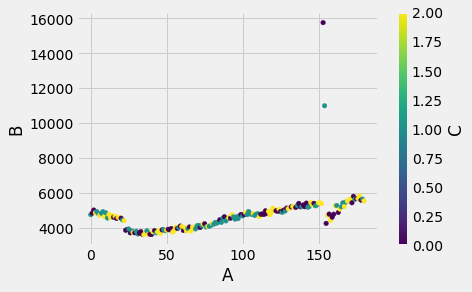

In [15]:
plot_scatter('https://www.bls.gov/charts/job-openings-and-labor-turnover/opening-hire-seps-level.htm')

In [18]:
DF = pd.read_html('https://www.bls.gov/charts/job-openings-and-labor-turnover/opening-hire-seps-level.htm')
DF = DF[0]
DF.head()

,Month,Total nonfarm job openings,Total nonfarm hires,Total nonfarm separations,Total private job openings,Total private hires,Total private separations,Government job openings,Government hires,Government separations
0,June 2007,4859,5267,5108,4415,4884,4758,444,382,350
1,July 2007,4598,5217,5225,4150,4893,4850,449,325,375
2,Aug 2007,4546,5358,5382,4086,4958,5024,460,400,358
3,Sept 2007,4652,5344,5197,4204,4954,4868,448,391,328
4,Oct 2007,4636,5398,5252,4207,5068,4937,429,330,316


<AxesSubplot:xlabel='A', ylabel='B'>

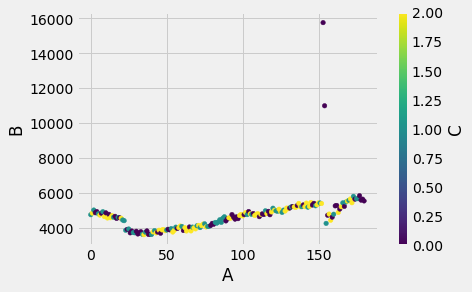

In [19]:
# DF.loc[df['Total private separations']]

l = [i for i in range(df['Total private separations'].count())]
cc = np.random.choice([0, 1, 2], size=df['Total private separations'].count())
lis = []
for i in range(181):
    lis.append([l[i], df['Total private separations'][i],cc[i]])
df_1 = pd.DataFrame(lis, columns=['A', 'B', 'C'])

df_1.plot.scatter(x="A",  y="B", c="C", colormap='viridis')

In [22]:
DF.loc[DF['Total private separations'] > 15000]

,Month,Total nonfarm job openings,Total nonfarm hires,Total nonfarm separations,Total private job openings,Total private hires,Total private separations,Government job openings,Government hires,Government separations
153,Mar 2020,5919,5222,16336,5218,4835,15759,701,388,577
